In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
dataset = pd.read_csv("/Users/AyshaZia/Desktop/fashion-mnist_train.csv")
print (dataset.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59950 entries, 7 to 60000
Columns: 785 entries, fashion-mnist_train to Unnamed: 784
dtypes: object(785)
memory usage: 359.5+ MB


In [3]:
dataset.isnull().sum().sum()

0

In [4]:
dataset.duplicated().sum()

43

In [30]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(59958, 785)

In [43]:
dataset.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [46]:
# Creating X and y variables
X=dataset.drop('label',axis=1)
Y=dataset.label

In [48]:
xx=X[0:500]
yy=Y[0:500]

In [51]:
xx.shape

(500, 784)

In [53]:
normalize=MinMaxScaler()

In [54]:
test_error_rate=[]
train_error_rate=[]
for k in range(1,31):
    # creating a KNN model with K
    knn=KNeighborsClassifier(k)
    # sequence of operations to be performed
    operations=[('normalize',normalize),('knn',knn)]
    # creating a pipeline
    pipe=Pipeline(steps=operations)
    # performing 5-fold cross validation using the pipeline and df
    cross_dict=cross_validate(pipe,xx,yy,cv=5,scoring='accuracy', return_train_score=True)
    # capturing train and test error rate for elbow graph
    test_error_rate.append(cross_dict['test_score'].mean())
    train_error_rate.append(cross_dict['train_score'].mean())

In [55]:
test_error_rate

[0.708,
 0.702,
 0.726,
 0.7060000000000001,
 0.726,
 0.724,
 0.7180000000000001,
 0.7140000000000001,
 0.712,
 0.708,
 0.7,
 0.708,
 0.7020000000000001,
 0.6899999999999998,
 0.686,
 0.6859999999999999,
 0.6839999999999999,
 0.6980000000000001,
 0.698,
 0.688,
 0.6819999999999999,
 0.674,
 0.672,
 0.668,
 0.6719999999999999,
 0.668,
 0.6679999999999999,
 0.666,
 0.6759999999999999,
 0.6759999999999999]

In [56]:
train_error_rate=[1-acc for acc in train_error_rate]
test_error_rate=[1-acc for acc in test_error_rate]

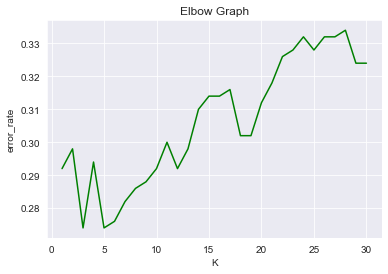

In [60]:
plt.title('Elbow Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(1,31),y=test_error_rate, color='green');

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)

In [62]:
X_norm=normalize.fit_transform(xx)

In [63]:
knn.fit(X_norm,yy)

KNeighborsClassifier()

In [64]:
y_pred=knn.predict(X_norm)
y_pred

array([8, 9, 4, 0, 3, 4, 4, 7, 4, 8, 0, 6, 9, 0, 2, 0, 9, 3, 0, 3, 8, 7,
       6, 4, 0, 4, 4, 6, 7, 1, 5, 0, 7, 0, 3, 9, 3, 2, 2, 1, 6, 0, 9, 0,
       0, 7, 6, 7, 7, 2, 5, 2, 2, 4, 1, 4, 9, 8, 0, 4, 5, 9, 6, 3, 5, 8,
       5, 9, 8, 1, 2, 8, 1, 4, 2, 8, 3, 4, 2, 5, 3, 2, 6, 8, 1, 6, 7, 3,
       6, 4, 6, 5, 0, 1, 7, 3, 7, 9, 2, 3, 8, 5, 0, 5, 3, 0, 8, 7, 6, 1,
       0, 7, 2, 1, 9, 7, 6, 9, 3, 3, 2, 2, 0, 6, 1, 0, 3, 5, 9, 7, 7, 0,
       3, 6, 7, 2, 4, 1, 3, 1, 0, 2, 3, 0, 3, 3, 6, 7, 9, 3, 7, 2, 6, 8,
       8, 0, 7, 5, 6, 1, 9, 5, 3, 7, 0, 8, 9, 7, 7, 7, 0, 9, 2, 0, 0, 4,
       1, 9, 4, 7, 2, 3, 0, 0, 8, 3, 5, 2, 3, 2, 6, 1, 7, 7, 5, 7, 7, 8,
       0, 4, 3, 9, 7, 4, 5, 3, 2, 7, 6, 9, 6, 9, 2, 1, 2, 7, 3, 8, 3, 1,
       3, 0, 0, 0, 3, 2, 8, 9, 2, 8, 8, 2, 6, 6, 8, 7, 0, 1, 3, 9, 5, 1,
       9, 0, 7, 7, 7, 2, 3, 8, 2, 2, 5, 9, 3, 4, 9, 3, 1, 3, 0, 9, 1, 4,
       9, 9, 4, 2, 3, 6, 1, 4, 9, 3, 7, 4, 6, 7, 0, 1, 1, 7, 2, 2, 1, 0,
       3, 1, 5, 5, 8, 4, 7, 2, 3, 8, 4, 5, 5, 6, 3,

Text(34.0, 0.5, 'Actuals')

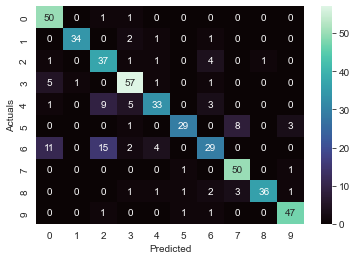

In [66]:
sns.heatmap(confusion_matrix(yy,y_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [67]:
print(classification_report(yy,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        52
           1       0.97      0.89      0.93        38
           2       0.59      0.82      0.69        45
           3       0.81      0.88      0.84        65
           4       0.80      0.65      0.72        51
           5       0.91      0.71      0.79        41
           6       0.71      0.48      0.57        61
           7       0.82      0.96      0.88        52
           8       0.97      0.80      0.88        45
           9       0.90      0.94      0.92        50

    accuracy                           0.80       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.81      0.80      0.80       500



In [68]:
train_accuracy=round(100*accuracy_score(yy,y_pred),2)
print(f'The train accuracy score is {train_accuracy}%')

The train accuracy score is 80.4%


In [69]:
#reading the data csv and converting it into a dataframe
dataset = pd.read_csv("/Users/AyshaZia/Desktop/fashion-mnist_test.csv")
#quick peek into the dataframe
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [72]:
dataset.isnull().sum().sum()

0

In [76]:
dataset.duplicated().sum()

0

In [79]:
X_test=dataset.drop('label',axis=1)
y_test=dataset.label

In [80]:
X_test_norm=normalize.transform(X_test)

In [81]:
y_test_pred=knn.predict(X_test_norm)
y_test_pred

array([0, 1, 2, ..., 8, 2, 6])

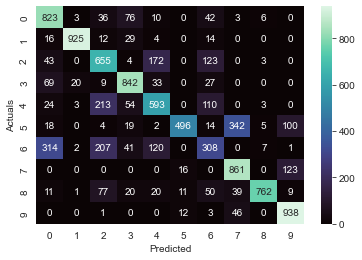

In [82]:
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

In [83]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       999
           1       0.97      0.93      0.95      1000
           2       0.54      0.66      0.59      1000
           3       0.78      0.84      0.81      1000
           4       0.62      0.59      0.61      1000
           5       0.93      0.50      0.65      1000
           6       0.45      0.31      0.36      1000
           7       0.67      0.86      0.75      1000
           8       0.97      0.76      0.85      1000
           9       0.80      0.94      0.86      1000

    accuracy                           0.72      9999
   macro avg       0.73      0.72      0.71      9999
weighted avg       0.73      0.72      0.71      9999



In [84]:
test_accuracy=round(100*accuracy_score(y_test,y_test_pred),2)
print(f'The test accuracy score is {test_accuracy}%')

The test accuracy score is 72.04%
